In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [ ]:
data, columns = parse_arff('drive/MyDrive/content/Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)

In [ ]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [1, 2, 3, 4, 5] # regularization parameter
degree = [1, 2, 3, 4, 5, 6] # polinomial degree
gamma = ['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']
#SVC

In [ ]:
svc_models = []
for kernel in kernels:
    for decision in decision_function_shape:
        for gam in gamma:
            for deg in degree:
                for c in C:
                    svc_models.append(SVC(kernel = kernel, C = c, degree = deg, gamma = gam, decision_function_shape=decision).fit(x_train, y_train))

In [ ]:
losses = ['hinge', 'squared_hinge']
penalty = ['l2']
C = [1, 2, 3, 4, 5] # regularization parameter
multi_class = ['ovr', 'crammer_singer']
#LİNEARSVC LinearSVC(loss = loss, penalty = pen, C = c, multi_class = multi).fit(x_train, y_train)

In [ ]:
linearsvc_model = []
for loss in losses:
    for pen in penalty:
        for c in C:
            for multi in multi_class:
                linearsvc_model.append(LinearSVC(loss = loss, penalty = pen, C = c, multi_class = multi).fit(x_train, y_train))

In [ ]:
acc_svc = []
acc_linearsvc = []

for model in svc_models:
    acc_svc.append(accuracy_score(y_test, model.predict(x_test)))

for model in linearsvc_model:
    acc_linearsvc.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
svckernelacc = [(np.sum(acc_svc[i*120:(i+1)*120])/120) for i in range(len(kernels))]
linearsvclossacc = [(np.sum(acc_svc[i*10:(i+1)*10])/10) for i in range(len(losses))]

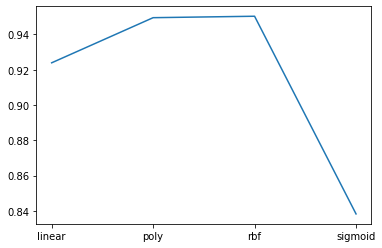

In [ ]:
plt.plot(kernels, svckernelacc)
plt.show()

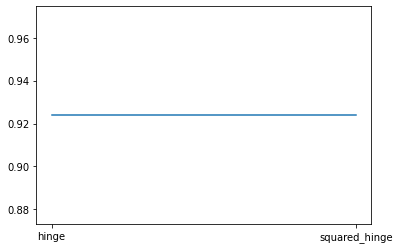

In [ ]:
plt.plot(losses, linearsvclossacc)
plt.show()

In [ ]:
svcC1 = 0
svcC2 = 0
svcC3 = 0
svcC4 = 0
svcC5 = 0
for i in range(96):
  svcC1 += acc_svc[(i*5)]
  svcC2 += acc_svc[(i*5)+1]       
  svcC3 += acc_svc[(i*5)+2]
  svcC4 += acc_svc[(i*5)+3]
  svcC5 += acc_svc[(i*5)+4]

In [ ]:
svcC1 = np.sum(svcC1) / 96
svcC2 = np.sum(svcC2) / 96
svcC3 = np.sum(svcC3) / 96
svcC4 = np.sum(svcC4) / 96
svcC5 = np.sum(svcC5) / 96

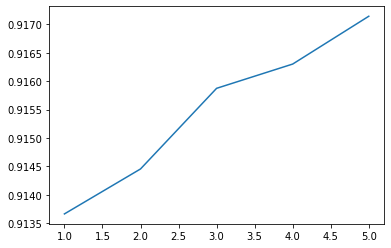

In [ ]:
plt.plot([1,2,3,4,5], [svcC1, svcC2, svcC3, svcC4, svcC5])
plt.show()

In [ ]:
lsvcC1 = (sum(acc_linearsvc[:2]) + sum(acc_linearsvc[10:12])) / 4
lsvcC2 = (sum(acc_linearsvc[2:4]) + sum(acc_linearsvc[12:14])) / 4
lsvcC3 = (sum(acc_linearsvc[4:6]) + sum(acc_linearsvc[14:16])) / 4
lsvcC4 = (sum(acc_linearsvc[6:8]) + sum(acc_linearsvc[16:18])) / 4
lsvcC5 = (sum(acc_linearsvc[8:10]) + sum(acc_linearsvc[18:])) / 4

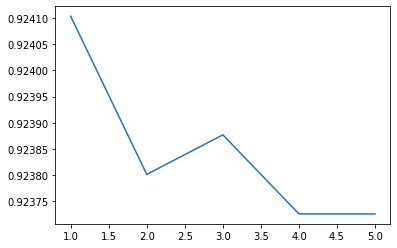

In [ ]:
plt.plot([1,2,3,4,5], [lsvcC1, lsvcC2, lsvcC3, lsvcC4, lsvcC5])
plt.show()

In [ ]:
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

In [ ]:
knn = []
for k in range(1, 10):
    for weight in weights:
        for algo in algorithm:
            for m in metric:
                knn.append(KNeighborsClassifier(n_neighbors=k, weights = weight, algorithm = algo, metric=m).fit(x_train, y_train))

In [ ]:
acc_knn = []
for model in knn:
    acc_knn.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
k9acc, k1acc, k2acc, k3acc, k4acc, k5acc, k6acc, k7acc, k8acc = sum(acc_knn[256:])/32, sum(acc_knn[:32])/32, sum(acc_knn[32:64])/32, sum(acc_knn[64:96])/32, sum(acc_knn[96:128])/32, sum(acc_knn[128:160])/32, sum(acc_knn[160:192])/32, sum(acc_knn[192:224])/32, sum(acc_knn[224:256])/32

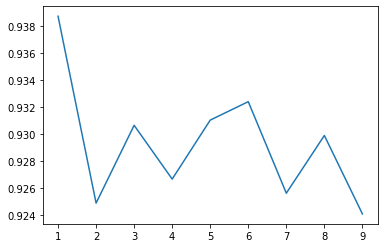

In [ ]:
plt.plot(range(1, 10), [k1acc, k2acc, k3acc, k4acc, k5acc, k6acc, k7acc, k8acc, k9acc])
plt.show()

In [ ]:
euclidean = 0
manhattan = 0
chebyshev = 0
minkowski = 0
for i in range(72):
  euclidean += acc_knn[(i*4)]
  manhattan += acc_knn[(i*4)+1]       
  chebyshev += acc_knn[(i*4)+2]
  minkowski += acc_knn[(i*4)+3]

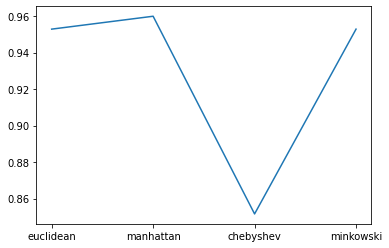

In [ ]:
plt.plot(metric, [euclidean/72, manhattan/72, chebyshev/72, minkowski/72])
plt.show()

In [ ]:
alpha = [0,1.,2.,3.,4.,5.,7.,9.,11.]
binarize = [0,1.,2.,3.,4.,5.,7.,9.,11.] #BernoulliNB
fit_prior = [True, False]

In [ ]:
bnbmodels = []
for a in alpha:
    for b in binarize:
        for fit in fit_prior:
            bnbmodels.append(BernoulliNB(alpha = a, binarize = b, fit_prior = fit).fit(x_train, y_train))

In [ ]:
bnbacc = []
for model in bnbmodels:
    bnbacc.append(accuracy_score(y_test, model.predict(x_test)))

In [ ]:
alph = []
a = 0
for i in range(9):
  alph.append(sum(bnbacc[i*18:(i+1)*18])/18)

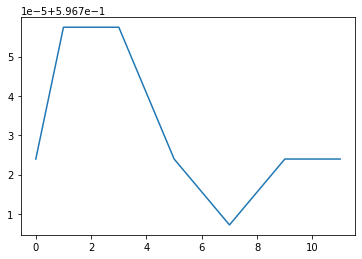

In [ ]:
plt.plot(alpha, alph)
plt.show()

In [ ]:
max_features = [None, 'auto', 'sqrt', 'log2']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
bootstrap  = [True, False]
class_weight = [None, 'balanced', 'balanced_subsample']
warm_start = [True, False]

In [ ]:
randomforest_acc = []
for weight in class_weight:
  for max in max_features:
    for cri in criterion:
      for s in warm_start:
        randomforest_acc.append(accuracy_score(y_test, RandomForestClassifier(warm_start = s, class_weight=weight, max_features = max , criterion = cri).fit(x_train, y_train).predict(x_test)))

In [ ]:
dtree_acc = []
for weight in class_weight[:-1]:
  for max in max_features:
    for cri in criterion:
      for split in splitter:
        dtree_acc.append(accuracy_score(y_test, DecisionTreeClassifier(class_weight = weight, max_features=max, splitter = split, criterion = cri).fit(x_train, y_train).predict(x_test)))

In [ ]:
weightacc = []
for i in range(3):
  weightacc.append(sum(randomforest_acc[i*16:(i+1)*16])/16)

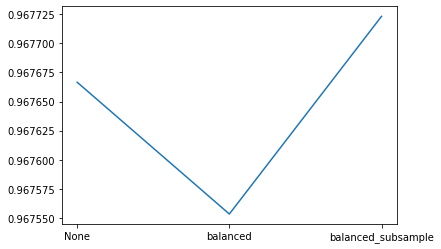

In [ ]:
plt.plot(['None', 'balanced', 'balanced_subsample'], weightacc)
plt.show()

In [ ]:
weightaccdecision = []
for i in range(8):
  weightaccdecision.append(sum(randomforest_acc[i*4:(i+1)*4])/4)

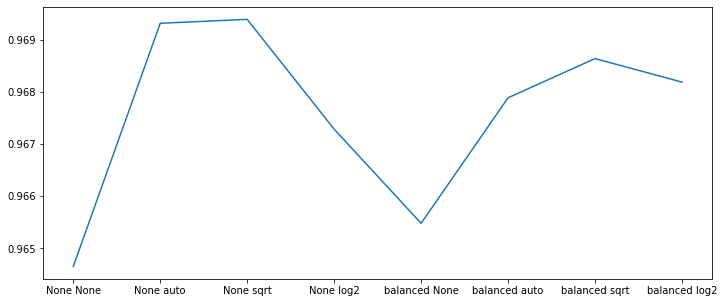

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(['None None', 'None auto', 'None sqrt', 'None log2', 'balanced None', 'balanced auto', 'balanced sqrt', 'balanced log2'], weightaccdecision)
plt.show()

In [ ]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
loss_fn = keras.losses.Huber(delta=1.0)
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl', opt]
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

In [ ]:
keras_models = []
for acti in activation:
  model = keras.Sequential()
  model.add(Dense(64, input_shape = (30,),  activation='relu'))
  model.add(Dense(128, kernel_regularizer=l2(0.0001), activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128,  activation='relu'))
  model.add(Dense(1,activation=acti))
  keras_models.append(model)

In [ ]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []

for m in keras_models:
  for opt in optimizers:
    for loss in binary_loss:
      m.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
      modelhistory = m.fit(x_train, y_train, epochs = 7, validation_data=(x_test, y_test))
      train_acc.append(modelhistory.history['accuracy'])
      val_acc.append(modelhistory.history['val_accuracy'])
      train_loss.append(modelhistory.history['loss'])
      val_loss.append(modelhistory.history['val_loss'])

In [ ]:
acti_acctrain = []
acti_losstrain = []
for i in range(8):
  acti_acctrain.append(sum(train_acc[i*36:(i+1)*36])/36)
  acti_losstrain.append(sum(train_loss[i*36:(i+1)*36])/36)

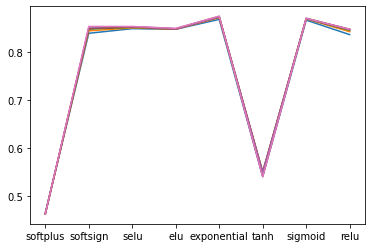

In [ ]:
plt.plot(activation, acti_acctrain)
plt.show()

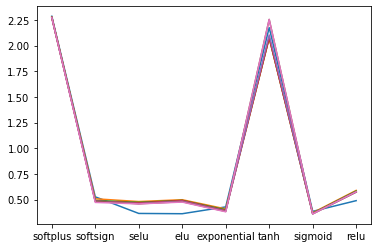

In [ ]:
plt.plot(activation, acti_losstrain)
plt.show()

In [ ]:
acti_accval = []
acti_lossval = []
for i in range(8):
  acti_accval.append(sum(val_acc[i*36:(i+1)*36])/36)
  acti_lossval.append(sum(val_loss[i*36:(i+1)*36])/36)

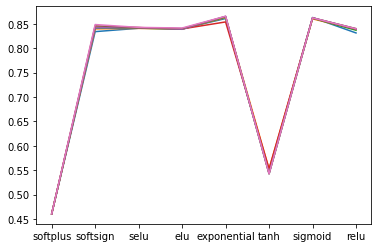

In [ ]:
plt.plot(activation, acti_accval)
plt.show()

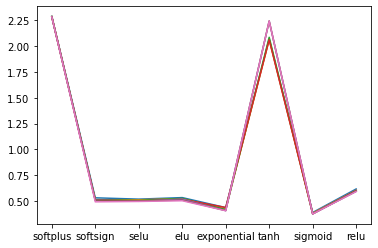

In [ ]:
plt.plot(activation, acti_lossval)
plt.show()

In [ ]:
sgd = []
rmsprop = []
adam = []
adadelta = []
adagrad = []
adamax = []
nadam = []
ftrl = []
optsgd = []
for i in range(9):
  sgd.append(sum(train_acc[i*32:i*32+4])/28)
  rmsprop.append(sum(train_acc[i*32+4:i*32+8])/28)
  adam.append(sum(train_acc[i*32+8:i*32+12])/28)
  adadelta.append(sum(train_acc[i*32+12:i*32+16])/28)
  adagrad.append(sum(train_acc[i*32+16:i*32+20])/28)
  adamax.append(sum(train_acc[i*32+20:i*32+24])/28)
  nadam.append(sum(train_acc[i*32+24:i*32+28])/28)
  ftrl.append(sum(train_acc[i*32+28:i*32+32])/28)
  optsgd.append(sum(train_acc[i*32+32:i*32+36])/28)

In [ ]:
sgd = sum(sum(sgd)) / 9
rmsprop = sum(sum(rmsprop)) / 9
adam = sum(sum(adam)) / 9
adadelta = sum(sum(adadelta)) / 9
adagrad = sum(sum(adagrad)) / 9
adamax = sum(sum(adamax)) / 9
nadam = sum(sum(nadam)) / 9
ftrl = sum(sum(ftrl)) / 9
optsgd = sum(sum(optsgd)) / 9

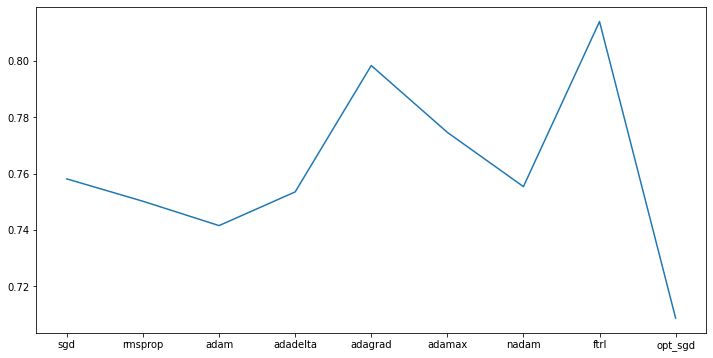

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl', 'opt_sgd'],[sgd,rmsprop, adam, adadelta, adagrad, ftrl, nadam, adamax, optsgd])
plt.show()

In [ ]:
i = 0
for m in activation:
  for opt in optimizers:
    for loss in binary_loss:
      if i < 36:
        print(m, opt, loss)
      i+=1

softplus sgd binary_crossentropy
softplus sgd hinge
softplus sgd squared_hinge
softplus sgd <tensorflow.python.keras.losses.Huber object at 0x7fc81a325210>
softplus rmsprop binary_crossentropy
softplus rmsprop hinge
softplus rmsprop squared_hinge
softplus rmsprop <tensorflow.python.keras.losses.Huber object at 0x7fc81a325210>
softplus adam binary_crossentropy
softplus adam hinge
softplus adam squared_hinge
softplus adam <tensorflow.python.keras.losses.Huber object at 0x7fc81a325210>
softplus adadelta binary_crossentropy
softplus adadelta hinge
softplus adadelta squared_hinge
softplus adadelta <tensorflow.python.keras.losses.Huber object at 0x7fc81a325210>
softplus adagrad binary_crossentropy
softplus adagrad hinge
softplus adagrad squared_hinge
softplus adagrad <tensorflow.python.keras.losses.Huber object at 0x7fc81a325210>
softplus adamax binary_crossentropy
softplus adamax hinge
softplus adamax squared_hinge
softplus adamax <tensorflow.python.keras.losses.Huber object at 0x7fc81a3252

In [ ]:
train_acc[8*32+32:8*32+36], len(train_acc)

(array([], shape=(0, 7), dtype=float64), 288)

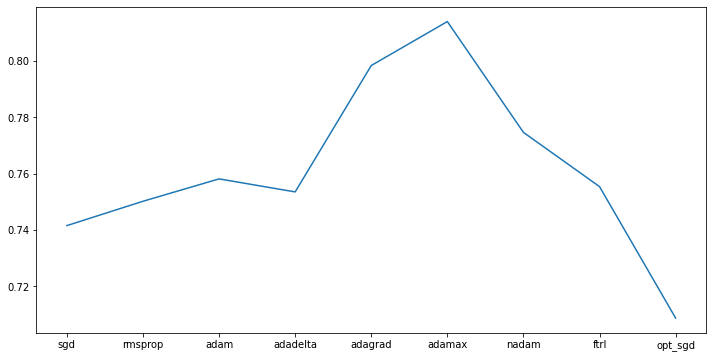

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl', 'opt_sgd'],[adam, rmsprop, sgd, adadelta, adagrad, ftrl, adamax, nadam, optsgd])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier())

In [ ]:
clf.fit(x_train, y_train).score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9586976183298161

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.2)
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier())
clf.fit(x_train, y_train).score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9692446856625961

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.35)
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [ ]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=KNeighborsClassifier())
clf.fit(x_train, y_train).score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

0.9612403100775194

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [ ]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9426356589147287

In [ ]:
x_train.shape

(7185, 30)

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(1,1), activation='relu',input_shape=(2,5,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(1,1),activation='relu'))


model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))

model.add(keras.layers.Conv2D(128,(1,1),activation='relu'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
x = x_train
x = x.reshape((7185, 2, 5, 3))
xt = x_test.reshape((3870, 2, 5, 3))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
modelhistory = model.fit(x, y_train, epochs = 50, validation_data=(xt, y_test))

Epoch 1/50
225/225 [==============================] - 2s 7ms/step - loss: 0.2015 - accuracy: 0.9123 - val_loss: 0.2834 - val_accuracy: 0.8897
Epoch 2/50
225/225 [==============================] - 2s 7ms/step - loss: 0.1974 - accuracy: 0.9180 - val_loss: 0.3002 - val_accuracy: 0.8884
Epoch 3/50
225/225 [==============================] - 2s 7ms/step - loss: 0.1960 - accuracy: 0.9154 - val_loss: 0.2895 - val_accuracy: 0.8904
Epoch 4/50
225/225 [==============================] - 2s 7ms/step - loss: 0.1947 - accuracy: 0.9161 - val_loss: 0.3006 - val_accuracy: 0.8891
Epoch 5/50
225/225 [==============================] - 1s 7ms/step - loss: 0.1950 - accuracy: 0.9143 - val_loss: 0.2738 - val_accuracy: 0.8961
Epoch 6/50
225/225 [==============================] - 1s 7ms/step - loss: 0.1853 - accuracy: 0.9218 - val_loss: 0.2945 - val_accuracy: 0.8891
Epoch 7/50
225/225 [==============================] - 2s 7ms/step - loss: 0.1865 - accuracy: 0.9177 - val_loss: 0.2937 - val_accuracy: 0.8894
Epoch 

In [ ]:
train_loss = modelhistory.history['loss']
train_accuracy = modelhistory.history['accuracy']
val_loss = modelhistory.history['loss']
val_accuracy = modelhistory.history['accuracy']

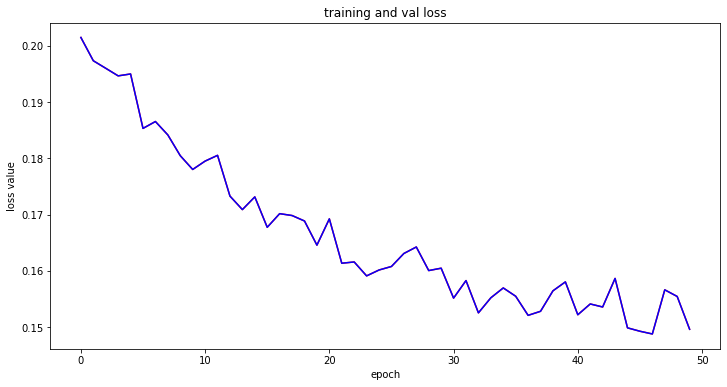

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_loss,'r',label='training loss')
plt.plot(val_loss,'b',label='val loss')
plt.title('training and val loss')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()

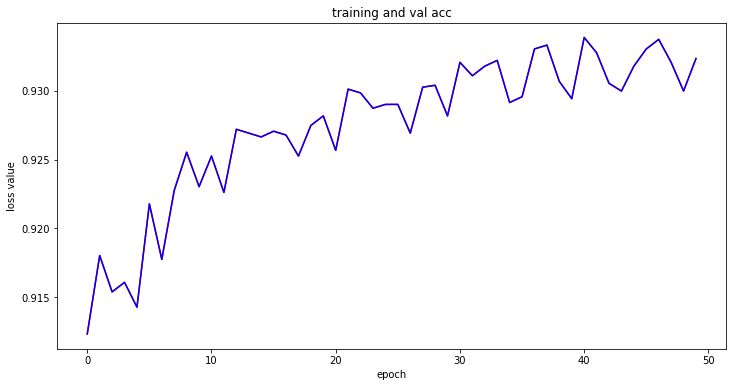

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train_accuracy,'r',label='training acc')
plt.plot(val_accuracy,'b',label='val acc')
plt.title('training and val acc')
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.show()

In [ ]:
model = keras.Sequential()
model.add(Dense(40, input_shape = (30,),  activation='relu'))
model.add(Dense(20, kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Dense(1,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
modelhistory = model.fit(x_train, y_train, epochs = 7, validation_data=(x_test, y_test))

Epoch 1/7
225/225 [==============================] - 1s 3ms/step - loss: 0.5778 - accuracy: 0.5580 - val_loss: 0.3095 - val_accuracy: 0.5628
Epoch 2/7
225/225 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.5581 - val_loss: 0.2304 - val_accuracy: 0.5628
Epoch 3/7
225/225 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.5650 - val_loss: 0.2053 - val_accuracy: 0.5628
Epoch 4/7
225/225 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.5702 - val_loss: 0.1916 - val_accuracy: 0.5628
Epoch 5/7
225/225 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.5628 - val_loss: 0.1872 - val_accuracy: 0.5628
Epoch 6/7
225/225 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.5535 - val_loss: 0.1795 - val_accuracy: 0.5628
Epoch 7/7
225/225 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.5517 - val_loss: 0.1762 - val_accuracy: 0.5628


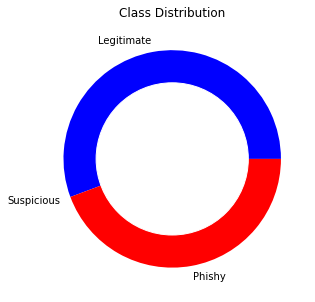

In [85]:
legit = len(df[df['Result'] == '1'])
susp = len(df[df['Result'] == '0'])
phishy = len(df[df['Result'] == '-1'])

size=[legit, susp, phishy]
names = ['Legitimate', 'Suspicious', 'Phishy']
 
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, colors=['blue','pink','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.rcParams["figure.figsize"] = (5,5)
plt.title('Class Distribution')
plt.show()

In [87]:
def plot_class_distribution(feature, color, data, labels):

  class_info = data[feature].value_counts().sort_index()
  #x = class_info.index
  x = labels
  x_pos = [i for i, _ in enumerate(x)]

  y = class_info.values

  fig, ax = plt.subplots()
  rects1 = ax.bar(x_pos, y, color=color)
  # helper function to show the number of examples in each bar
  def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.f' % float(height),
        ha='center', va='bottom')
  autolabel(rects1)
  plt.ylabel("Number of Examples")
  plt.title(feature + " examples distribution\n")
  plt.xticks(x_pos, x)

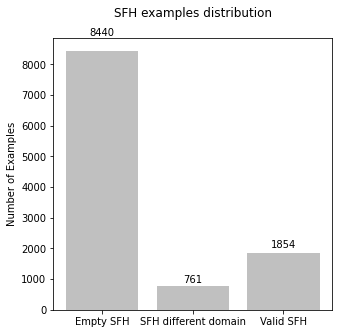

In [88]:
sfh_labels = ['Empty SFH', 'SFH different domain', 'Valid SFH']
plot_class_distribution('SFH', 'silver', df, sfh_labels)

In [98]:
df.columns, df['Request_URL']

(Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
        'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
        'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
        'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
        'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
        'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
        'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
        'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
        'Result'],
       dtype='object'), 0         1
 1         1
 2         1
 3        -1
 4         1
          ..
 11050     1
 11051     1
 11052     1
 11053    -1
 11054    -1
 Name: Request_URL, Length: 11055, dtype: object)

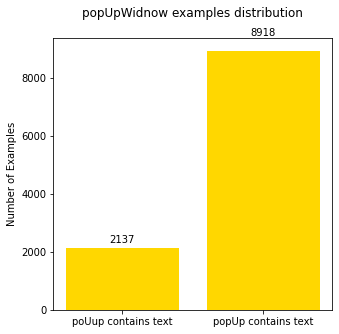

In [94]:
pop_labels = ['poUup contains text', 'popUp contains text']
plot_class_distribution('popUpWidnow', 'gold', df, pop_labels)

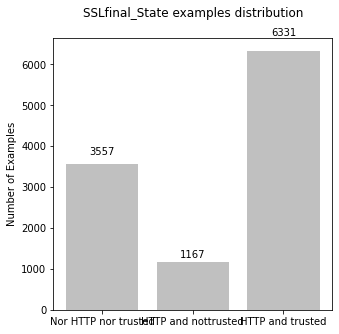

In [96]:
ssl_labels = ['Nor HTTP nor trusted', 'HTTP and nottrusted', 'HTTP and trusted']
plot_class_distribution('SSLfinal_State', 'silver', df, ssl_labels)

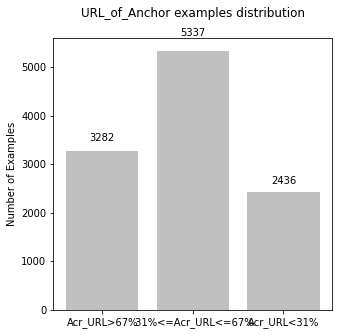

In [99]:
anchor_labels = [ 'Acr_URL>67%',' 31%<=Acr_URL<=67%', 'Acr_URL<31%']
plot_class_distribution('URL_of_Anchor', 'silver',df, anchor_labels)

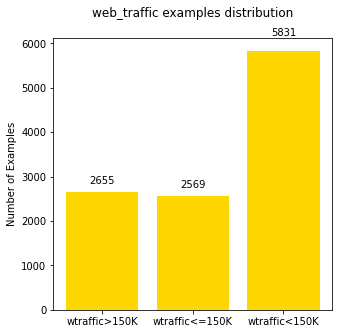

In [100]:
web_labels = ['wtraffic>150K', 'wtraffic<=150K', 'wtraffic<150K']
plot_class_distribution('web_traffic', 'gold', df, web_labels)

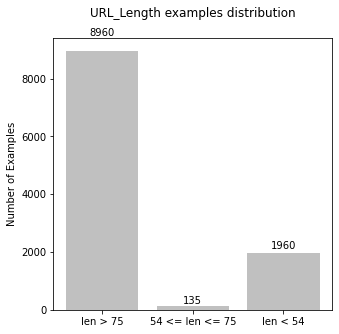

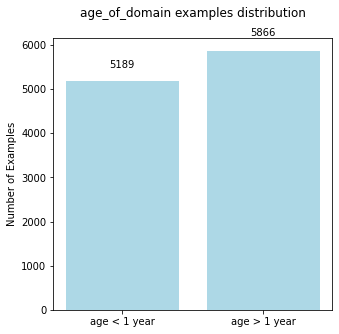

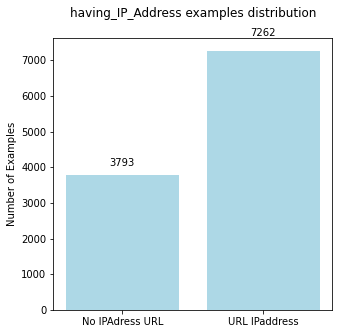

In [102]:
url_labels = ['len > 75', '54 <= len <= 75', 'len < 54']
plot_class_distribution('URL_Length', 'silver', df, url_labels)

age_labels = ['age < 1 year', 'age > 1 year']
plot_class_distribution('age_of_domain', 'lightblue', df, age_labels)

ip_labels = ['No IPAdress URL','URL IPaddress']
plot_class_distribution('having_IP_Address', 'lightblue', df, ip_labels)

In [103]:
dfip = df[df['having_IP_Address'] == 1]
dfnoip = df[df['having_IP_Address'] == 0]
 
labelsip = dfip['Result'].value_counts().index
valuesip = dfip['Result'].value_counts().values
 
labelsnoip = dfnoip['Result'].value_counts().index
valuesnoip = dfnoip['Result'].value_counts().values
 
 
barWidth = 0.25
 
bars1 = [ valuesip[0], valuesnoip[0]]
bars2 = [valuesip[1], valuesnoip[1]]
bars3 = [valuesip[2], valuesnoip[2]]
 
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#E4D9FF', width=barWidth, edgecolor='white', label='Phishy')
plt.bar(r2, bars2, color='lightblue', width=barWidth, edgecolor='white', label='Legitimate')
plt.bar(r3, bars3, color='silver', width=barWidth, edgecolor='white', label='Suspicious')
 
# Add xticks on the middle of the group bars
plt.xlabel('Class distribution by presence of IP addres in the URL', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))],['With IPaddress', 'Without IPaddress'] )
 
 
plt.legend()
plt.show()

IndexError: ignored